In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
occupancy_data = pd.read_csv('./../data-workfile/daily_occupancy.csv', index_col='Unnamed: 0')
occupancy_data.head()

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend
0,2024-09-18,2024-09-18,67.368,hotel_1,0,2,2,0
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1


In [42]:
occupancy_data

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend
0,2024-09-18,2024-09-18,67.368,hotel_1,0,2,2,0
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1
...,...,...,...,...,...,...,...,...
10783,2024-10-18,2025-08-27,2.632,hotel_3,313,2,2,0
10784,2024-10-18,2025-08-28,2.632,hotel_3,314,3,3,0
10785,2024-10-18,2025-08-29,0.000,hotel_3,315,4,4,0
10786,2024-10-18,2025-08-30,0.000,hotel_3,316,5,5,1


In [43]:
occupancy_data.columns

Index(['recording_date', 'subject_date', 'fill_rate', 'hotel_id',
       'days_until_stay', 'stay_day_of_week', 'subject_day_of_week',
       'subject_is_weekend'],
      dtype='object')

<Axes: xlabel='days_until_stay', ylabel='fill_rate'>

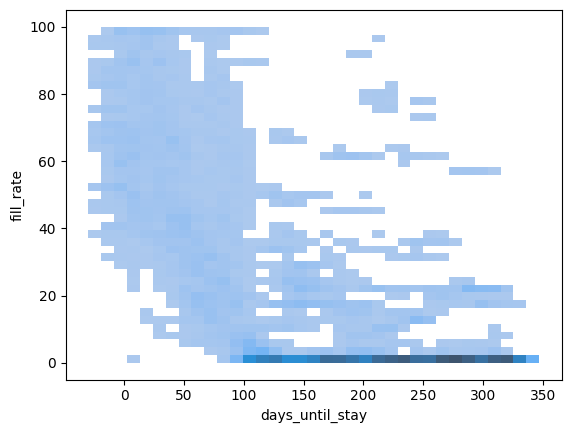

In [44]:
sns.histplot(data=occupancy_data, x='days_until_stay', y='fill_rate')

In [51]:
occupancy_hotel1 = occupancy_data[(occupancy_data['hotel_id']=='hotel_1') & (occupancy_data['days_until_stay']> 0)]#[['days_until_stay','fill_rate','stay_day_of_week','subject_day_of_week','subject_is_weekend']].groupby(by='days_until_stay').mean().reset_index()
occupancy_hotel2 = occupancy_data[(occupancy_data['hotel_id']=='hotel_2') & (occupancy_data['days_until_stay']> 0)]#[['days_until_stay','fill_rate','stay_day_of_week','subject_day_of_week','subject_is_weekend']].groupby(by='days_until_stay').mean().reset_index()
occupancy_hotel3 = occupancy_data[(occupancy_data['hotel_id']=='hotel_3') & (occupancy_data['days_until_stay']> 0)]#[['days_until_stay','fill_rate','stay_day_of_week','subject_day_of_week','subject_is_weekend']].groupby(by='days_until_stay').mean().reset_index()

In [52]:
occupancy_hotel1

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1
5,2024-09-18,2024-09-23,55.263,hotel_1,5,0,0,0
...,...,...,...,...,...,...,...,...
10783,2024-10-18,2025-08-27,0.526,hotel_1,313,2,2,0
10784,2024-10-18,2025-08-28,0.526,hotel_1,314,3,3,0
10785,2024-10-18,2025-08-29,0.526,hotel_1,315,4,4,0
10786,2024-10-18,2025-08-30,0.526,hotel_1,316,5,5,1


<Axes: xlabel='days_until_stay'>

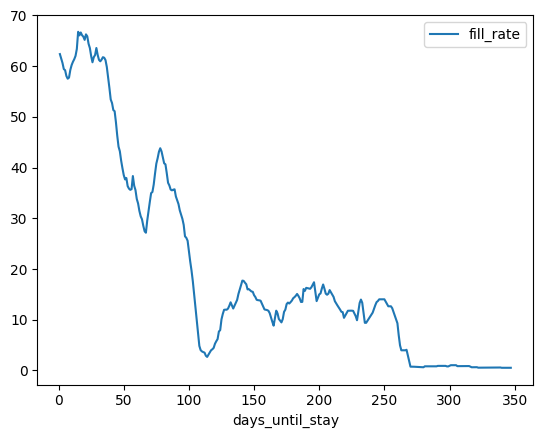

In [65]:
occupancy_data[(occupancy_data['hotel_id']=='hotel_1') & (occupancy_data['days_until_stay']> 0)][['days_until_stay','fill_rate']].groupby(by='days_until_stay').mean().plot()

In [ ]:
# Calculate the daily change in fill_rate within each subject_date
occupancy_hotel1['fill_rate_change'] = occupancy_hotel1.groupby('subject_date')['fill_rate'].diff()
# Fill NaN values for the first recording_date of each subject_date (optional, set to 0 or drop)
occupancy_hotel1['fill_rate_change'] = occupancy_hotel1['fill_rate_change'].fillna(0)

occupancy_hotel2['fill_rate_change'] = occupancy_hotel2.groupby('subject_date')['fill_rate'].diff()
occupancy_hotel2['fill_rate_change'] = occupancy_hotel2['fill_rate_change'].fillna(0)

occupancy_hotel3['fill_rate_change'] = occupancy_hotel3.groupby('subject_date')['fill_rate'].diff()
occupancy_hotel3['fill_rate_change'] = occupancy_hotel3['fill_rate_change'].fillna(0)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_72661/4253583157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy_hotel1['fill_rate_change'] = occupancy_hotel1.groupby('subject_date')['fill_rate'].diff()
/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_72661/4253583157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy_hotel1['fill_rate_change'] = occupancy_hotel1['fill_rate_change'].fillna(0)


<Axes: xlabel='days_until_stay', ylabel='fill_rate_change'>

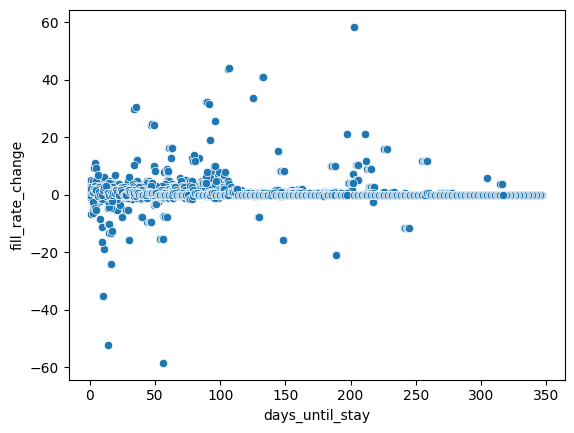

In [63]:
sns.scatterplot(data=occupancy_hotel1, x='days_until_stay', y='fill_rate_change')

In [54]:
occupancy_hotel1

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend,fill_rate_change
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0,0.0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0,0.0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1,0.0
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1,0.0
5,2024-09-18,2024-09-23,55.263,hotel_1,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
10783,2024-10-18,2025-08-27,0.526,hotel_1,313,2,2,0,0.0
10784,2024-10-18,2025-08-28,0.526,hotel_1,314,3,3,0,0.0
10785,2024-10-18,2025-08-29,0.526,hotel_1,315,4,4,0,0.0
10786,2024-10-18,2025-08-30,0.526,hotel_1,316,5,5,1,0.0


In [ ]:
# recording_date alapján hozzácsapni:
#   - price gap, df['price_gap'] = df['picked_price_p_night'] - df['offered_price_median']
#   - conversion
#   - picked_price_p_night
#   - offered_price
#   - daily_ppc_cost
#   - is_holiday



In [30]:
occupancy_data[(occupancy_data['hotel_id']=='hotel_1') & (occupancy_data['days_until_stay']> 0)][['recording_date','subject_date','fill_rate','days_until_stay']].groupby(by=['subject_date','recording_date']).mean()#, x='recording_date',y='fill_rate', hue='days_until_stay')

fill_rate  days_until_stay
subject_date recording_date                            
2024-09-19   2024-09-18         65.789              1.0
2024-09-20   2024-09-18         67.895              2.0
             2024-09-19         69.474              1.0
2024-09-21   2024-09-18         59.474              3.0
             2024-09-19         63.684              2.0
...                                ...              ...
2025-08-31   2024-10-14          0.526            321.0
             2024-10-15          0.526            320.0
             2024-10-16          0.526            319.0
             2024-10-17          0.526            318.0
             2024-10-18          0.526            317.0

[10292 rows x 2 columns]

<Axes: xlabel='subject_date', ylabel='fill_rate'>

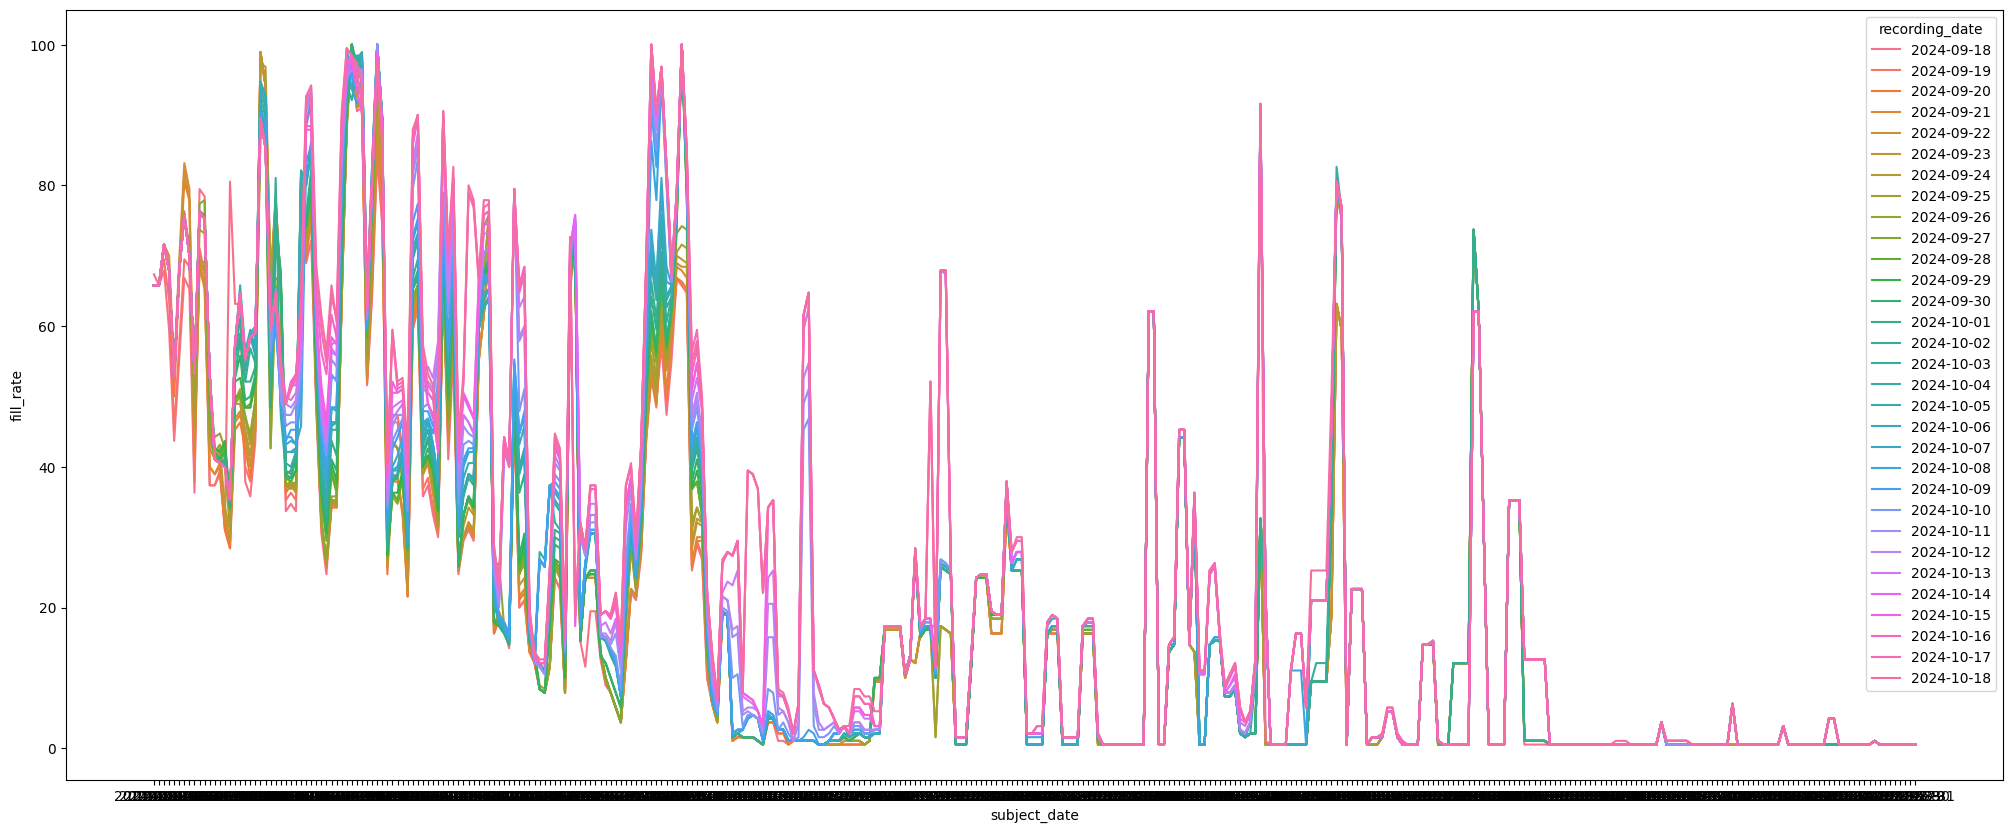

In [38]:
plt.figure(figsize=(25,10))
sns.lineplot(data=occupancy_data[occupancy_data['hotel_id']=='hotel_1'], x='subject_date', y='fill_rate', hue='recording_date')

In [ ]:
# az adott subject date mennyit valtozik 

In [13]:
occupancy_data['subject_date'].value_counts()

subject_date
2024-09-18    93
2025-05-05    93
2025-05-13    93
2025-05-12    93
2025-05-11    93
              ..
2025-01-10    93
2025-01-09    93
2025-01-08    93
2025-01-07    93
2025-08-31    93
Name: count, Length: 348, dtype: int64